In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [11]:
df=pd.read_csv("Occupancy.csv")
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [13]:
print(df.columns)


Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


In [15]:
numeric_features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
data = df[numeric_features]


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(data_pca)

anomalies = data_pca[dbscan_labels == -1]
anomaly_count = len(anomalies)
total_points = len(data_pca)

anomaly_percentage = (anomaly_count / total_points) * 100
print(f"Percentage of points flagged as anomalies: {anomaly_percentage:.2f}%")

Percentage of points flagged as anomalies: 0.03%


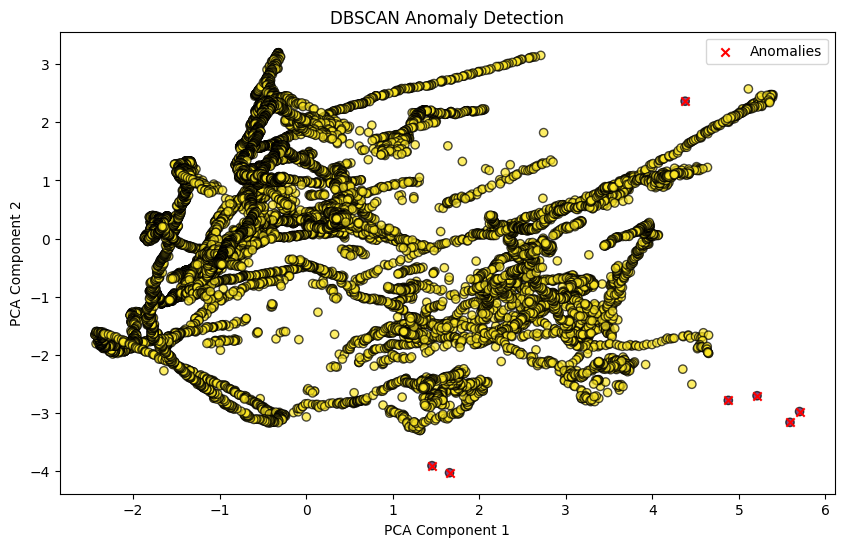

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', marker='x', label='Anomalies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Anomaly Detection')
plt.legend()

In [23]:
print("\nAnomaly Report:")
print(f"Total Data Points: {total_points}")
print(f"Anomalies Detected: {anomaly_count}")
print("Higher anomalies might indicate sensor malfunctions or unusual environmental changes.")


Anomaly Report:
Total Data Points: 20560
Anomalies Detected: 7
Higher anomalies might indicate sensor malfunctions or unusual environmental changes.
